In [47]:
using XLSX
using LibPQ
using DataFrames

regex_key = [r".*(A|a)llianz.*",r".*Almenni.*",r".*VÍB.*",r".*(A|a)rion.*",r"(b|B)ayern",r".*Birta.*",r".*(B|b)rú.*",r"Eftirlaunasj.*\sLandsb(anka|\.) (og|&) Seðlabanka",r"Eftirlaunasj.*(Sláturf(él|.)).*(Suðurlands).*",r"Eftirlaunasj(\.|óður)(\s|)(s|S)tarfsm(\.|anna|m\.)(\s|)Íslandsb(\.|anka)(\s(h|H)f\.|).*",r".*Glitn.*",r"Eftirlaunasj.*(Hafnarfj).*(kaupst\.|kaupstaðar|arðk\.|arðark\.)",r"Eftirlaunasj.*(|\n)(Olí|OLÍ).*",r"(EFÍA|Eftir(-|)launa(-|-\s|)sj(\.|\s|óður)(\s|\s\s|)(atvinnuflugmanna|FÍA))",r"Eftirlaunasj.*Reykjanes(-|-\s|)bæjar",r".*Eftirlaunasj.*(\s|)slökkvil.* á(\s|)Keflav.*",r"Eftirl.*\s*(starfsm|stm).*\s*(Ú|ú)tvegsb.*\s*Ísl.*",r".*Festa.*",r".*Frjálsi.*",r".*(G|g)ildi.*",r".*(Í|í)slandsbanki.*",r".*Íslenski.*",r"(Kjölur lífeyris).*",r".*(K|k)vika.*",r".*(L|l)andsbankinn.*",r"Lífeyris(-sjóður|sjóður|sj)(\s|\.|\.\s)(l|L)ækna.*",r"Lífeyris(-|)(sj\.|sjóður )(\n|\s|)Suðurlands",r"(Lífeyris).*(sjóðurinn).*(Skjöldur)",r".*Eining.*",r".*Hlíf.*",r".*(Akranes(-|-\s|)kaupst).*",r"(L|l)ífeyrissj.*(\.|\s)(Bolungar).*",r"(Lífeyris).*(sj).*(Eimskipa).*",r"Lífeyrissj.*ísl.*stjst.* á Kefl.{0,1}v.{0,4}flugv.*",r".*((\.|\s)Nes(-|)kaup).*(\.|staðar)",r".*(Húsa(-|-\s|)víkur(k|k\.|-|))(\.|aupstaðar|bæjar|).*",r".*Lífeyris(-|)(sj\.|sjóður )(\s|)(stm\.|starfsm\.|starfsmanna)\sR(eykjavíkur|vík\.)(-|-\s|)apóteks.*",r"Lífeyrissj(\.|óður\s)(\s|)(stm|starfsmanna|starfsm\.)(\.\s|\s|)Vestm.*eyja(\s|b\.|bæjar|-bæjar)",r".*(A|a)rkitekta.*(T|t)æknifr.*",r".*K\.E\.A\..*",r".*Líf.*(V|v)erkal.*fél\.(\sá\s|\s|)Norðurl\. v.*",r"Lífeyrissj.* alþingis(-\s|)manna.*",r"Lífeyris(-|-\s|)sjóður Arkitekta",r"(L|l)ífeyris(-|)sj(\.|óður )(\s|)(Austur(-|-\s|)lands).*",r".*(B|b)ænda.*",r".*Lífeyrissj.*(b|B)anka(-|-\s|)m.*",r".*(B|b)laða(-\s|)manna.*",r"(l|L)ífeyrissj.*(F|f)élags.*ísl.*leikara",r"(L|l)ífeyrissj.*(\.|\s)(Flugvirkja(-f|fé|f.)).*",r".*(L|l)íf.+(H|h)júkrunar(-|-\s|)fræðinga.*",r"Lífeyrissj.*Iðnaðarm.*Suðurnesja",r".*(L|l)eigubifr.*",r"(L|l)ífeyrissj.*(\.|\s).*(Mjólkur).*",r"(L|l)ífeyrissj.*(\.|\s)(Norður(-|-\s|)(lands|))",r"Lífeyrissj.* ráðherra",r"Lífeyris(-|)sj(\.|óður\s)(\s|)Rang(\.|æinga)",r".*(S|s)jómanna.*",r".*(S|s)jóvá.*",r"Lífeyrissj(óður|\.\s|\.)(\s|\.|)(stm\.|starfsm)(anna\s|\s|\.\s)Akur(-|-\s|)eyrar(b\.|bæjar)",r".*(B|b)únaðar.*",r".*Lífeyrissj(óður|\.)(\s|)(stm\.|starfsm\.|starfsmanna)\sKópa(-|-\s|)vogs(b\.|bæjar|kaupst).*",r".*Lífeyris(sjóður|-sjóður|sj\.)(\s|\.|)((S|s)tm\.\s|(S|s)tarfsmanna|(S|s)tarfsm\.)(\s|)Reykjav(íkurb\.|b\.|íkurborgar|\.).*",r"(Lífeyrissj.*(starfsm(\.|anna)|\.(\s|)st\.|\.\sst\.m\.|stm\.)\s(R|r)íkisins|.*LSR.*)",r"Lífeyriss(s|)j(óður|\.)(\s|)(s|S)t.*(\s|\.|)(s|S)veitarfél(\.|aga)",r".*(Áburðarv(.|e)).*",r"Lífeyrissj(\.|óður)(\s|)Suður(-|-\s|)nesja",r"Lífeyrissj.*Tæknifr.* Íslands",r".*(Tannl|tannl).*",r".*Grindavík.*",r"Lífeyrissj.*verkal.* á Suðurl(andi|\.)",r".*(Lífeyrissj).*((V|v)erk.*)fr.*",r".*((L|l)íf[a-z. óð]*Versl|(L|l)íf[a-z. óð]*versl).*",r"Lífeyrissj(óður|\.)((\s|)Vest(-\s|-\s\s|-|)firðinga)",r".*Lífeyrissj(\.|óður)(\s|)Vestm(\.|(anna(-|-\s|)eyja)).*",r".*Lífeyris(-|)(sj\.|sjóður)(\s|)Vestur(-|-\s|)lands.*",r".*Framsýn.*",r"(L|l)ífey.*(\.|\s)(Lífiðn)+",r".*Lífsval.*",r".*(L|l)ífsverk.*",r"Sameinaði(\s|)lífeyris(-|-\s|)sjóðurinn",r".*(S|s)amvinnu(-|).*",r".*Séreigna.*lífeyris.*sjóðurinn.*",r"(S|s)öfnunarsj(\.\s|\.|óður\s)(lífeyris(-|)réttinda|)",r".*Stafir.*",r".*(S|s)tapi.*",r".*Trygginga.*sjóður.*lækna.*",]

file = open("login_for_sql.txt", "r")
username = chomp(readline(file))
password = chomp(readline(file))
close(file)

conn = LibPQ.Connection("dbname=Symmetria user=$username password=$password")

PostgreSQL connection (CONNECTION_OK) with parameters:
  user = postgres
  password = ********************
  channel_binding = prefer
  dbname = Symmetria
  port = 5432
  client_encoding = UTF8
  options = -c DateStyle=ISO,YMD -c IntervalStyle=iso_8601 -c TimeZone=UTC
  application_name = LibPQ.jl
  sslmode = prefer
  sslcompression = 0
  sslsni = 1
  ssl_min_protocol_version = TLSv1.2
  gssencmode = disable
  krbsrvname = postgres
  target_session_attrs = any

In [9]:
# Taka fjölda samtrygginga f. öll ár, eftir árum. Skoða kostnaðinn á samtryggingunni eingöngu, taka 
# summu kostnaðarins fyrir hvert ár og skala hann við vísitölu neysluverðs frá verðlaginu í dag


# BÚIÐ, SÖLVI GERÐI ÞETTA

#sql_string = "SELECT
#  EXTRACT(YEAR FROM date::timestamp) as year,
#  COUNT( fund_name) as number_of_funds,
#  ROUND(SUM(value)) as total_rekstrarkostnadur
#FROM
#  useful_combinations_view
#WHERE
#    attribute1 = 'Rekstur' AND 
#	attribute2 = 'Rekstrarkostnaður' AND 
#	attribute3 = '(Samtals) Rekstrarkostnaður' AND 
#	subfund_type = 'Samtrygging'
#GROUP BY
#  year
#ORDER BY
#  year;"
#sql_result = execute(conn, sql_string) |> DataFrame

#print(sql_result)  

#dir_path = "./skjölin frá Birgi/Files/"

#filename = "visitala.xlsx"
#filepath = joinpath(dir_path, filename)
#visitolu_sheet = DataFrame(XLSX.readtable(filepath, "ársvísitala", header = true))

#print(visitolu_sheet)



25×3 DataFrame
 Row │ year     number_of_funds  total_rekstrarkostnadur 
     │ Decimal  Int64?           Decimal                 
─────┼───────────────────────────────────────────────────
   1 │    1997               55                   593979
   2 │    1998               56                   651021
   3 │    1999               60                   760427
   4 │    2000               70                  1105611
   5 │    2001               85                  1787962
   6 │    2002               60                  1069692
   7 │    2003               59                  1179816
   8 │    2004               54                  1306019
   9 │    2005               52                  1413770
  10 │    2006               48                  1520446
  11 │    2007               43                  1617769
  12 │    2008               42                  1720242
  13 │    2009               40                  1882747
  14 │    2010               36                  2033991
  15 │    201

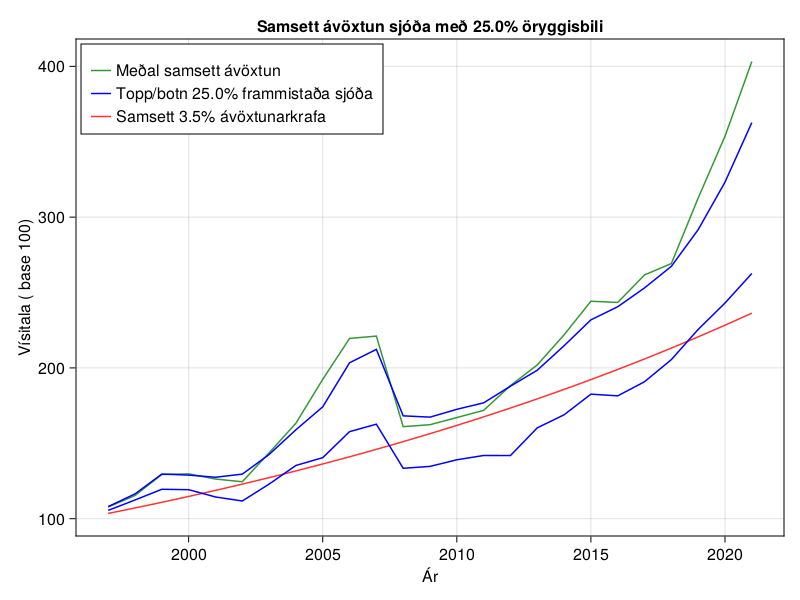

CairoMakie.Screen{IMAGE}


In [219]:
# gera graf fyrir meðalávöxtun ( eignirA*ávA+eignirB*ávB ...) með topp-bottom 25% performers, leggja 3.5% ávöxtunarkröfu 
# ofaná 
using XLSX
using LibPQ
using DataFrames

# Define the PostgreSQL database connection parameters
file = open("login_for_sql.txt", "r")
username = chomp(readline(file))
password = chomp(readline(file))
close(file)

conn = LibPQ.Connection("dbname=Symmetria user=$username password=$password")

sql_string = "SELECT
    fund_name,
    EXTRACT(YEAR FROM to_timestamp(date, 'YYYY-MM-DD HH24:MI:SS'))::integer AS year,
	SUM(CASE
        WHEN attribute1 = 'Kennitölur' AND attribute2 = 'Hrein raunávöxtun (%)' THEN value
        ELSE 0
    END) AS hrein_raunavöxtun,
    SUM(CASE
        WHEN attribute1 = 'Efnahagsreikningur' AND attribute2 = 'Eignir' AND attribute3 = '(Samtals) Eignir samtals' THEN value
        ELSE 0
    END) AS eignir_samtals
FROM
    useful_combinations_view
WHERE
    subfund_type = 'Samtrygging'
GROUP BY
    fund_name, year
ORDER BY
    fund_name, year;"


result = execute(conn, sql_string) |> DataFrame
df = DataFrame(result)

df_sorted = sort(df, [:year])

for i in 1:size(df_sorted, 1)
    year = df_sorted.year[i]
    if year > 2005
        df_sorted.hrein_raunavöxtun[i] /= 100
    end
end

#println(df_sorted)

vísitala = []
vísitala_saman = [100.0]

ár = 1997
weighted = 0
sum_weight = 0

árið = []

# Create an empty dictionary
sjóðadict = Dict()

for i in 1:size(df_sorted, 1)
    if df_sorted.year[i] != ár
        push!(vísitala,weighted/sum_weight)
        push!(vísitala_saman,last(vísitala_saman)*(1+weighted/sum_weight))
        weighted = 0
        sum_weight = 0
        ár += 1
        
        árið = sort(árið)
        
        stærð = size(árið,1)
        
        árið = []
    end

    ávöxtun = parse(Float64, string(df_sorted.hrein_raunavöxtun[i]))
    eign = parse(Float64, string(df_sorted.eignir_samtals[i]))
    
    push!(árið,ávöxtun)
    
    weighted += eign*(ávöxtun)
    sum_weight += eign 
end


push!(vísitala,weighted/sum_weight)
push!(vísitala_saman,last(vísitala_saman)*(1+weighted/sum_weight))


#Row │ fund_name                          year    hrein_raunavöxtun        eignir_samtals 

#println(vísitala_saman)

for i in 1:size(df_sorted, 1)
    ávöxtun = parse(Float64, string(df_sorted.hrein_raunavöxtun[i]))
    nafn = df_sorted.fund_name[i]
    
    ár = parse(Int64, string(df_sorted.year[i]))
    
    if haskey(sjóðadict, nafn)
        # If the key already exists, append the value to the corresponding list
        á_undan = last(sjóðadict[nafn])[2]
        push!(sjóðadict[nafn], [ár, á_undan * (1+ávöxtun)])
    else
        # If the key doesn't exist, create a new key with an empty list as the value
        upphafspunktur = vísitala_saman[ár-1996]
        sjóðadict[nafn] = [[ár, upphafspunktur*(1+ávöxtun)]]
    end
end

#println(sjóðadict)

toppline = []
bottomline = []

current_year = []
diff = 0.25

for year in 1997:2021
    for (key, value) in pairs(sjóðadict)
        if isempty(value)
            continue
        end
        if value[1][1] == year
            fremsti = popfirst!(value)
            push!(current_year,fremsti[2])
        end
    end
    current_year = sort(current_year)
    
    topp = size(current_year)[1]*(1-diff)
    bottom = size(current_year)[1]*diff
    
    push!(toppline,current_year[Int(ceil(topp))])
    push!(bottomline,current_year[Int(ceil(bottom))])  
    current_year = []
end
# Print the resulting dictionary
#println(vísitala)

#println("topplínan $toppline\n")
#println("botnlínan $bottomline")

using CairoMakie

f = Figure()
ax = Axis(f[1, 1], xlabel = "Ár", ylabel = "Vísitala ( base 100)",    title = "Samsett ávöxtun sjóða með "*string(diff*100)*"% öryggisbili")

#println(vísitala)
visir = convert(Vector{Float64}, visitolu_sheet.Vísir)
prosentur = convert(Vector{Float64}, visitolu_sheet.prósentur)

toppline = map(x -> convert(Float64, x), toppline)
bottomline = map(x -> convert(Float64, x), bottomline)
vísitala = map(x -> convert(Float64, x), vísitala)


base = 100.0
base_profit = [base]

avxtnrkrafa35 = [base]
avxtnrkrafa45 = [base]
avxtnrkrafa55 = [base]
avxtnrkrafa65 = [base]
avxtnrkrafa75 = [base]
avxtnrkrafa85 = [base]

for (index, value) in enumerate(vísitala)
    next_base = base_profit[index]*(1+value)
    next_avxtnrkrafa35 = avxtnrkrafa35[index]*(1+0.035)
    next_avxtnrkrafa45 = avxtnrkrafa45[index]*(1+0.045)
    next_avxtnrkrafa55 = avxtnrkrafa55[index]*(1+0.055)
    next_avxtnrkrafa65 = avxtnrkrafa65[index]*(1+0.065)
    next_avxtnrkrafa75 = avxtnrkrafa75[index]*(1+0.075)
    next_avxtnrkrafa85 = avxtnrkrafa85[index]*(1+0.085)
    push!(base_profit,next_base)
    
    push!(avxtnrkrafa35,next_avxtnrkrafa35)
    push!(avxtnrkrafa45,next_avxtnrkrafa45)
    push!(avxtnrkrafa55,next_avxtnrkrafa55)
    push!(avxtnrkrafa65,next_avxtnrkrafa65)
    push!(avxtnrkrafa75,next_avxtnrkrafa75)
    push!(avxtnrkrafa85,next_avxtnrkrafa85)
end
popfirst!(base_profit)
popfirst!(avxtnrkrafa35)

#ax2 = Axis(f[2, 1], xlabel = "Ár", ylabel = "Raunávöxtun (%)",    title = "Meðal raunávöxtun sjóða")


lins1 = [lines!(ax, (0:1:(size(base_profit,1)-1)).+1997, base_profit, color=(:green,0.8)),
lines!(ax, (0:1:(size(toppline,1)-1)).+1997, toppline, color=(:blue,1)),
lines!(ax, (0:1:(size(avxtnrkrafa35,1)-1)).+1997, avxtnrkrafa35, color=(:red,0.8))
]

lines!(ax, (0:1:(size(bottomline,1)-1)).+1997, bottomline, color=(:blue,1))

#lins2 = [lines!(ax2, (0:1:(size(vísitala,1)-1)).+1997, vísitala),
#    lines!(ax2, (0:1:(size(vísitala,1)-1)).+1997, vísitala.-vísitala.+0.035, color=(:red,0.8)),
#lines!(ax2, (0:1:(size(vísitala,1)-1)).+1997, vísitala.-vísitala, color=(:black,0.6))]


Legend(
    f[1, 1], lins1, ["Meðal samsett ávöxtun","Topp/botn "*string(diff*100)*"% frammistaða sjóða","Samsett 3.5% ávöxtunarkrafa"],
    "",
    tellheight = false,
    tellwidth = false,
    margin = (5, 5, 5, 5),
    halign = :left, valign = :top, orientation = :vertical
)

#Legend(
#    f[2, 1], lins2, ["Meðal raunávöxtun","3.5% ávöxtunarkrafa","0% ávöxtun"],
#    "",
#    tellheight = false,
#    tellwidth = false,
#    margin = (0, 5, 5, 5),
#    halign = :right, valign = :bottom, orientation = :vertical
#)


display(f)



In [213]:
# hefur kaupmáttur eftir tegundum elli/örorku/barna hækkað með árunum miðað við fast verðlag

# BÚIÐ, GERÐ AF MATTA


dir_path = "./skjölin frá Birgi/Files/"

filename = "visitala.xlsx"
filepath = joinpath(dir_path, filename)
visitolu_sheet = DataFrame(XLSX.readtable(filepath, "ársvísitala", header = true))

#print(visitolu_sheet)
0

0

In [156]:
# lífeyrisbyrgði, hlutfall greidds lífeyris af greiddum iðgjöldum

# BÚIÐ, GERÐ AF MATTA

In [12]:
# net krónu græddar af kerfinu eftir árum, heildar staða allra ára ( net ) semsagt hvað lífeyriskerfið hefur búið til
# fyrir þjóðina frá 1997





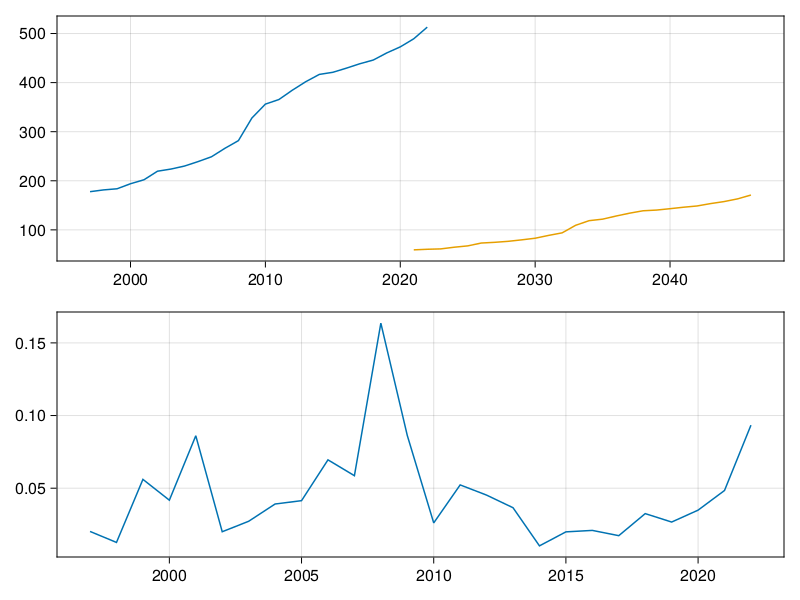

CairoMakie.Screen{IMAGE}


In [57]:
# dæmi um cairo makie
using CairoMakie

f = Figure()
ax = Axis(f[1, 1])


visir = convert(Vector{Float64}, visitolu_sheet.Vísir)
prosentur = convert(Vector{Float64}, visitolu_sheet.prósentur)

ax2 = Axis(f[2, 1])
lines!(ax, (0:1:(size(visir,1)-1)).+1997, visir)
lines!(ax, (0:1:(size(visir,1)-1)).+2021, visir/3)
lines!(ax2, (0:1:(size(prosentur,1)-1)).+1997, prosentur)
display(f)